In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
raw_data_frame = pd.read_csv(r"..\\raw_data_30m\\currency_pairs\\GBPJPY_M30.csv", sep='\t')

In [8]:
raw_data_frame

,Time,Open,High,Low,Close,Volume
0,2007-02-05 04:30:00,236.609,236.667,236.410,236.522,1489
1,2007-02-05 05:00:00,236.534,236.559,236.276,236.281,1590
2,2007-02-05 05:30:00,236.280,236.648,236.132,236.468,1711
3,2007-02-05 06:00:00,236.461,236.480,236.175,236.253,1546
4,2007-02-05 06:30:00,236.242,236.273,235.949,236.109,1474
...,...,...,...,...,...,...
199995,2023-02-10 13:00:00,158.498,158.626,158.465,158.555,2379
199996,2023-02-10 13:30:00,158.553,158.590,158.478,158.484,2185
199997,2023-02-10 14:00:00,158.480,158.527,158.412,158.450,2411
199998,2023-02-10 14:30:00,158.449,158.462,158.370,158.426,1599


In [9]:
# dataframe for close price to calculate 200 ema
close_price = raw_data_frame.drop(['Time', 'Open', 'High', 'Low', 'Volume'], axis=1)


In [10]:
# calculating 200 ema using ewm method in pd
def calculate_ema_200(data, n):
    ema = data.Close.ewm(span=n, adjust=False).mean()
    return ema
ema_200 = calculate_ema_200(close_price, 200)


In [11]:
ema_200 = ema_200.round(6)
ema_200

0         236.522000
1         236.519602
2         236.519089
3         236.516441
4         236.512387
             ...    
199995    158.762217
199996    158.759448
199997    158.756369
199998    158.753082
199999    158.749569
Name: Close, Length: 200000, dtype: float64

In [12]:
# making final dataframe with close price, 200 ema, volume
final_df = raw_data_frame.drop(['Time', 'Open', 'High', 'Low'], axis=1)
final_df['ema_200'] = ema_200


In [13]:
final_df

,Close,Volume,ema_200
0,236.522,1489,236.522000
1,236.281,1590,236.519602
2,236.468,1711,236.519089
3,236.253,1546,236.516441
4,236.109,1474,236.512387
...,...,...,...
199995,158.555,2379,158.762217
199996,158.484,2185,158.759448
199997,158.450,2411,158.756369
199998,158.426,1599,158.753082


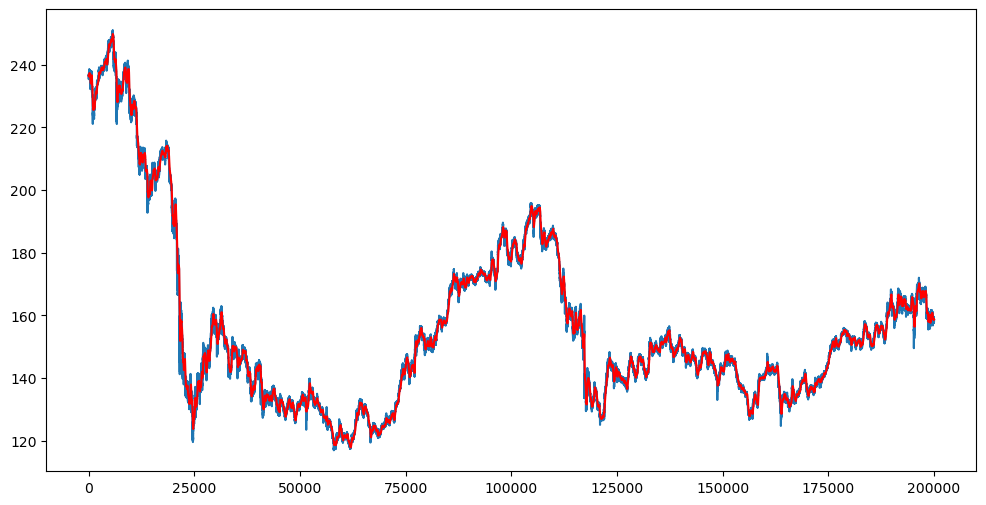

In [14]:
plt.figure(figsize=(12,6))
plt.plot(final_df.Close)
plt.plot(final_df.ema_200, 'r')


In [15]:
# making a Trend column for binary classification of the trend so as to decrease noise  
final_df['Trend'] = [1 if row['Close'] > row['ema_200'] + 0.001 * row['Close']
                        else -1 if row['Close'] < row['ema_200'] - 0.001 * row['Close']
                        else 0 for index, row in final_df.iterrows()]


In [16]:
final_df

,Close,Volume,ema_200,Trend
0,236.522,1489,236.522000,0
1,236.281,1590,236.519602,-1
2,236.468,1711,236.519089,0
3,236.253,1546,236.516441,-1
4,236.109,1474,236.512387,-1
...,...,...,...,...
199995,158.555,2379,158.762217,-1
199996,158.484,2185,158.759448,-1
199997,158.450,2411,158.756369,-1
199998,158.426,1599,158.753082,-1


In [ ]:
# no CROSSOVERS so need to fix 

In [3]:
# loading final dataframe directly
final_df = pd.read_csv('..\\pre_processed_data\\200_ema\\GBPJPY_M30.csv')

In [4]:
final_df = final_df.drop('Unnamed: 0', axis=1)

In [5]:
final_df
# currently eurusd

,Close,Volume,ema_200,Trend
0,236.522,1489,236.522000,0
1,236.281,1590,236.519602,-1
2,236.468,1711,236.519089,0
3,236.253,1546,236.516441,-1
4,236.109,1474,236.512387,-1
...,...,...,...,...
199995,158.555,2379,158.762217,-1
199996,158.484,2185,158.759448,-1
199997,158.450,2411,158.756369,-1
199998,158.426,1599,158.753082,-1


In [21]:
final_df.dtypes

Close      float64
Volume       int64
ema_200    float64
Trend        int64
dtype: object

START FROM HERE

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

In [7]:
x0=[]
x1=[]
x2=[]
y=[]

In [8]:
# taking sample size of 200
for i in range (0, final_df.shape[0] - 200):
    x0.append(final_df.iloc[i:i+200, 0])
    x1.append(final_df.iloc[i:i+200, 1])
    x2.append(final_df.iloc[i:i+200, 2])
    y.append(final_df.iloc[i+200, 3])

In [9]:
x0, x1, x2, y = np.array(x0), np.array(x1), np.array(x2), np.array(y)

In [10]:
y=np.reshape(y, (len(y), 1))

In [117]:
scaler = MinMaxScaler(feature_range=(0,1))
x0 = scaler.fit_transform(x0)
x1 = scaler.fit_transform(x1)
x2 = scaler.fit_transform(x2)
scaler = MinMaxScaler(feature_range=(0,1))
y = scaler.fit_transform(y)

In [128]:
y

array([[0. ],
       [0.5],
       [0.5],
       ...,
       [0. ],
       [0. ],
       [0. ]])

In [118]:
X = np.stack([x0, x1, x2], axis=2)

In [119]:
X.shape

(199800, 200, 3)

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense
from keras import optimizers

In [129]:
# tts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [130]:
y_test

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [131]:
X_train.shape

(159840, 200, 3)

In [132]:
model = Sequential()

In [133]:
model.add(CuDNNLSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(CuDNNLSTM(64, return_sequences=False))
model.add(Dense(64, activation='tanh'))
model.add(Dense(1))
# using tanh later try with sigmoid, and change minmax for reLU

In [134]:
optimizers.SGD(momentum=0.9)
model.compile(optimizer='SGD', loss='mse', metrics=['mae'])

In [99]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_4 (CuDNNLSTM)    (None, 200, 64)           17664     
                                                                 
 cu_dnnlstm_5 (CuDNNLSTM)    (None, 64)                33280     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 55,169
Trainable params: 55,169
Non-trainable params: 0
_________________________________________________________________


In [91]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping

# filepath = '..//models//{epoch:02d}-{loss:.4f}-{val_loss:.4f}-{mae:.4f}-{val_mae:.4f}.hdf5'

# callbacks = [EarlyStopping(monitor='val_loss', patience=20),
#             ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min')]
        

In [100]:
model.fit(X_train, y_train, validation_split=0.2, epochs=40, batch_size=40)


Epoch 1/40
3197/3197 [==============================] - 61s 19ms/step - loss: 0.8487 - mae: 0.8629 - val_loss: 0.8483 - val_mae: 0.8535
Epoch 2/40
3197/3197 [==============================] - 59s 19ms/step - loss: 0.7583 - mae: 0.7888 - val_loss: 0.6109 - val_mae: 0.7225
Epoch 3/40
3197/3197 [==============================] - 59s 19ms/step - loss: 0.6737 - mae: 0.7164 - val_loss: 0.7026 - val_mae: 0.7096
Epoch 4/40
3197/3197 [==============================] - 60s 19ms/step - loss: 0.6189 - mae: 0.6670 - val_loss: 0.6253 - val_mae: 0.6645
Epoch 5/40
3197/3197 [==============================] - 60s 19ms/step - loss: 0.5697 - mae: 0.6230 - val_loss: 0.5389 - val_mae: 0.6110
Epoch 6/40
3197/3197 [==============================] - 59s 18ms/step - loss: 0.5265 - mae: 0.5850 - val_loss: 0.4288 - val_mae: 0.5416
Epoch 7/40
3197/3197 [==============================] - 59s 18ms/step - loss: 0.4821 - mae: 0.5446 - val_loss: 0.6627 - val_mae: 0.6148
Epoch 8/40
3197/3197 [==========================

In [101]:
model.save(('..\models\\200_ema\\200_ema_30m-tanh-1.hdf5'))

In [135]:
model = keras.models.load_model('..\models\\200_ema\\200_ema_30m-relu.hdf5')

In [136]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06114126741886139
Test accuracy: 0.17251791059970856


In [137]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

1249/1249 [==============================] - 9s 7ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

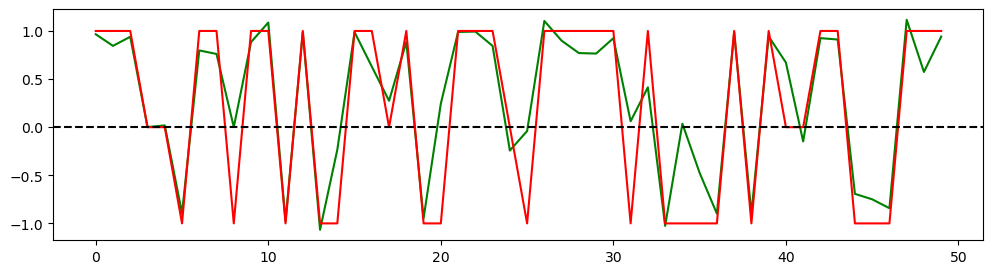

In [138]:
plt.figure(figsize=(12,3))
plt.plot(predictions[-50:], 'g')
plt.plot(scaler.inverse_transform(y_test[-50:]),  'r')
plt.axhline(y=0, color='black', linestyle='--')
plt.show